## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df = pd.read_csv('dataset.csv',encoding="ISO-8859-1")
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [3]:
df.shape

(99989, 3)

In [4]:
# Checking Missing values
df.isna().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [5]:
## Get the Independent Features

X=df.drop('Sentiment',axis=1)

In [6]:
X.head()

,ItemID,SentimentText
0,1,is so sad for my APL frie...
1,2,I missed the New Moon trail...
2,3,omg its already 7:30 :O
3,4,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,i think mi bf is cheating on me!!! ...


In [7]:
## Get the Dependent features
y=df['Sentiment']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Sentiment, dtype: int64

# Text Preprocessing

In [8]:
text = df.copy()
text.tail()

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [9]:
text['SentimentText'][2]

'              omg its already 7:30 :O'

### Removing User Ids

In [10]:
text['SentimentText'] = text['SentimentText'].str.replace("@[\w]*", "")

In [11]:
text.tail()

,ItemID,Sentiment,SentimentText
99984,99996,0,seems like a repeating problem hope you're...
99985,99997,1,arrrr we both replied to each other over diff...
99986,99998,0,ya i thought so
99987,99999,1,Yes. Yes. I'm glad you had more fun with me.
99988,100000,1,haha yes you do


##  Removing characters, stopwords and punctuation

In [12]:
# from nltk.corpus import stopwords
# import re
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
# corpus = []
# for i in range(0, len(text)):
#     review = re.sub('[^a-zA-Z]', ' ', text['SentimentText'][i])
#     review = review.lower()
#     review = review.split()
    
#     review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus.append(review)

Using Lemmatizer as it gave more accuracy than stemmer

In [13]:
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
ls = WordNetLemmatizer()
corpus = []
for i in range(0, len(text)):
    review = re.sub('[^a-zA-Z]', ' ', text['SentimentText'][i])
    review = review.lower()
    review = review.split()
    
    review = [ls.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [14]:
corpus

['sad apl friend',
 'missed new moon trailer',
 'omg already',
 'omgaga im sooo im gunna cry dentist since suposed get crown put min',
 'think mi bf cheating',
 'worry much',
 'juuuuuuuuuuuuuuuuussssst chillin',
 'sunny work tomorrow tv tonight',
 'handed uniform today miss already',
 'hmmmm wonder number',
 'must think positive',
 'thanks hater face day',
 'weekend sucked far',
 'jb isnt showing australia',
 'ok thats win',
 'lt way feel right',
 'awhhe man completely useless rt funny twitter http myloc hx',
 'feeling strangely fine gonna go listen semisonic celebrate',
 'huge roll thunder scary',
 'cut beard growing well year gonna start happy meantime',
 'sad iran',
 'wompppp wompp',
 'one see cause one else following pretty awesome',
 'lt sad level writing massive blog tweet myspace comp shut lost lay fetal position',
 'headed hospitol pull golf tourny rd place think ripped something yeah',
 'boring whats wrong please tell',
 'bothered wish could spend rest life sat going gig serio

In [43]:
text['CleanText']= corpus

In [16]:
text.drop('SentimentText',1,inplace = True)

In [17]:
text

,ItemID,Sentiment,CleanText
0,1,0,sad apl friend
1,2,0,missed new moon trailer
2,3,1,omg already
3,4,0,omgaga im sooo im gunna cry dentist since supo...
4,5,0,think mi bf cheating
...,...,...,...
99984,99996,0,seems like repeating problem hope able find so...
99985,99997,1,arrrr replied different tweet time see duno he...
99986,99998,0,ya thought
99987,99999,1,yes yes glad fun


In [18]:
happywords = " ".join([sentence for sentence in text['CleanText'][text['Sentiment']==1]])
sadwords = " ".join([sentence for sentence in text['CleanText'][text['Sentiment']==0]])

In [19]:
happywords

'omg already juuuuuuuuuuuuuuuuussssst chillin handed uniform today miss already hmmmm wonder number thanks hater face day feeling strangely fine gonna go listen semisonic celebrate one see cause one else following pretty awesome goodbye exam hello alcohol tonight uploading picture friendster wrote something last week got call someone new york office http tumblr com xcn w need even say well go anyways chris cornell chicago tonight health class joke lt go show tonight bathroom clean enjoyable task boom boom pow go give ur mom hug right http bit ly azfwv going see harry sunday happiness always get want bend backwards get work sooooon miss cody booo seen foreverr hate allergy get hair cut tomorrow taking public poll really going bed jin twitter gonna smile cuz im sure could want got home got see friend zahra seen since graduated make happy oh thank pleased rose ood back xmas special yay damn half year away thanks need help get explains alot going heather sequel winona ever better fuck trae

In [20]:
sadwords

'sad apl friend missed new moon trailer omgaga im sooo im gunna cry dentist since suposed get crown put min think mi bf cheating worry much sunny work tomorrow tv tonight must think positive weekend sucked far jb isnt showing australia ok thats win lt way feel right awhhe man completely useless rt funny twitter http myloc hx huge roll thunder scary cut beard growing well year gonna start happy meantime sad iran wompppp wompp lt sad level writing massive blog tweet myspace comp shut lost lay fetal position headed hospitol pull golf tourny rd place think ripped something yeah boring whats wrong please tell bothered wish could spend rest life sat going gig seriously feeeling like shit right really want sleep nooo hour dancing art assignment finish realize deep geez give girl warning atleast hate athlete appears tear acl live television miss guy think wearing skinny jean cute sweater heel really sure today meet meat http bit ly ssci horsie moving saturday morning sat need work day week rea

In [21]:
import nltk
happywords = nltk.word_tokenize(happywords)
sadwords = nltk.word_tokenize(sadwords)

In [22]:
happyfreq = nltk.FreqDist(happywords)
sadfreq = nltk.FreqDist(sadwords)

In [23]:
happy = pd.DataFrame({'HappyWord': list(happyfreq.keys()),
                 'Count': list(happyfreq.values())})
happy.head()

,HappyWord,Count
0,omg,282
1,already,396
2,juuuuuuuuuuuuuuuuussssst,1
3,chillin,31
4,handed,9


In [24]:
sad = pd.DataFrame({'SadWord': list(sadfreq.keys()),
                 'Count': list(sadfreq.values())})
sad.head()

,SadWord,Count
0,sad,1504
1,apl,1
2,friend,541
3,missed,549
4,new,625


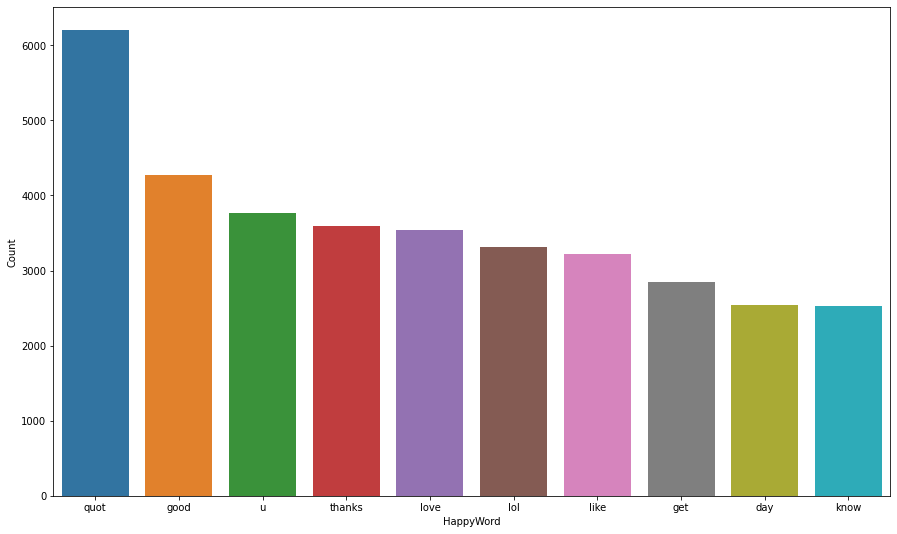

In [25]:
# select top Happy 10 words
happy = happy.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=happy, x='HappyWord', y='Count')
plt.show()

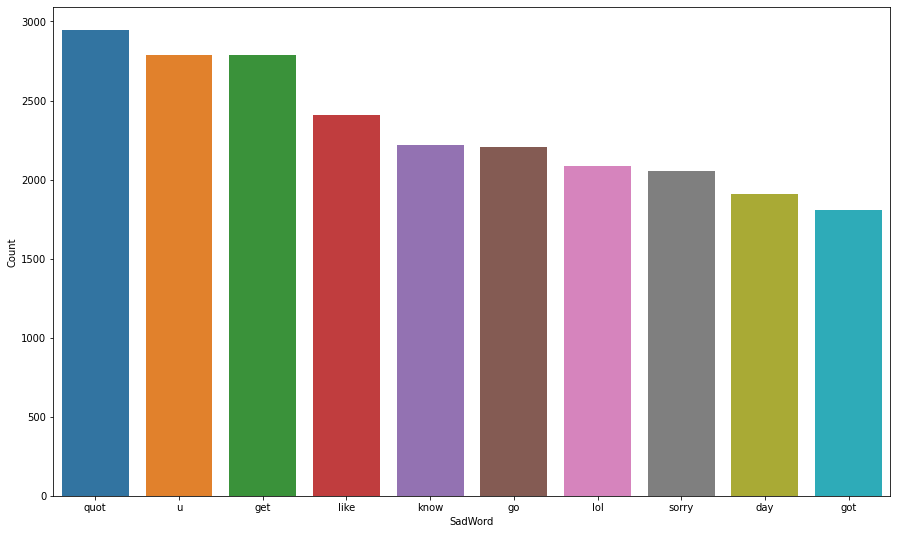

In [26]:
# select top Sad 10 words
sad = sad.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=sad, x='SadWord', y='Count')
plt.show()

# Feature Extraction
## Creating the Bag of Words model

In [27]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
# X = cv.fit_transform(corpus).toarray()

## Creating Tfidf model

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [29]:
X.shape

(99989, 5000)

In [30]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
y = text['Sentiment']

In [32]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [33]:
cv.get_feature_names()[:20]

['aaron',
 'ab',
 'ability',
 'able',
 'able get',
 'able go',
 'able make',
 'absolute',
 'absolutely',
 'abt',
 'ac',
 'accent',
 'accept',
 'accepted',
 'access',
 'accident',
 'accidentally',
 'according',
 'account',
 'ace']

In [34]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [35]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [36]:
count_df.head(10)

,aaron,ab,ability,able,able get,able go,able make,absolute,absolutely,abt,...,yucky,yum,yummy,yup,yur,zealand,zero,zombie,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## MultinomialNB Algorithm

In [37]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [38]:
from sklearn import metrics
import numpy as np

In [39]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
cm

accuracy:   0.739


array([[ 9027,  5451],
       [ 3152, 15367]], dtype=int64)

In [40]:
classifier=MultinomialNB(alpha=0.1)

## MultinomialNB Algorithm with Hyperparameter

In [41]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.7387035185016819
Alpha: 0.1, Score : 0.7388247416431797
Alpha: 0.2, Score : 0.7387641300724308
Alpha: 0.30000000000000004, Score : 0.7390974937115495
Alpha: 0.4, Score : 0.7388853532139286
Alpha: 0.5, Score : 0.7388550474285541
Alpha: 0.6000000000000001, Score : 0.7390974937115495
Alpha: 0.7000000000000001, Score : 0.7388550474285541
Alpha: 0.8, Score : 0.7390671879261751
Alpha: 0.9, Score : 0.7391581052822984


## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.7468860805527775

In [47]:
cm = metrics.confusion_matrix(y_test, pred)
cm

array([[ 9355,  5123],
       [ 3229, 15290]], dtype=int64)

Getting accurate sentiment analysis of upto 75% using Logistic Regression